In [3]:

import rtree, pygeos
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import folium

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import statsmodels.api as sm

C:\Anaconda3\envs\geo37\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:

data_path = 'C:/Users/mhudgell/data/dsa-jake/'
os.listdir(data_path)

['1 Team & Station Trip Level Data - April 2024 - Randomised.csv',
 'Total Number of Vehicles in Fleet - April 2024.csv',
 'Workshop Data - April 2024 - Randomised.csv']

In [6]:
file_path = data_path +'1 Team & Station Trip Level Data - April 2024 - Randomised.csv'
trip = pd.read_csv(file_path)
file_path = data_path +'Total Number of Vehicles in Fleet - April 2024.csv'
vehicles = pd.read_csv(file_path)
file_path = data_path +'Workshop Data - April 2024 - Randomised.csv'
workshop = pd.read_csv(file_path)

In [7]:
trip.head(2)

,Registration,Fleet,Vehicle Function,Station,Date,Time - Start,Time - End,Trip Count,Miles Travelled,Hours,Speed
0,111111,South Worcestershire,PATROL,WORCESTER,01-Apr-24,00:36:19,01:16:04,1,2.49,0.66,3.77
1,111111,South Worcestershire,PATROL,WORCESTER,01-Apr-24,02:23:22,02:30:37,1,2.30,0.12,19.17


In [8]:
veh = trip[['Registration','Fleet','Vehicle Function','Station','Date']]
veh_inuse = veh.groupby(['Fleet','Vehicle Function','Station','Date']).agg({'Registration': pd.Series.nunique})
veh_inuse = veh_inuse.reset_index()  
veh_inuse.head(2)


,Fleet,Vehicle Function,Station,Date,Registration
0,South Worcestershire,PATROL,WORCESTER,01-Apr-24,11
1,South Worcestershire,PATROL,WORCESTER,02-Apr-24,13


In [9]:
vehicles.head(2)

,Fleet,Vehicle Function,Station,Total Number of Vehicles,Date
0,South Worcestershire,PATROL,WORCESTER,15,01/04/2024
1,South Worcestershire,PATROL,WORCESTER,15,02/04/2024


In [10]:
workshop.head(2)

,Registration,Date,Availability
0,111111,01/04/2024,0
1,111111,02/04/2024,0


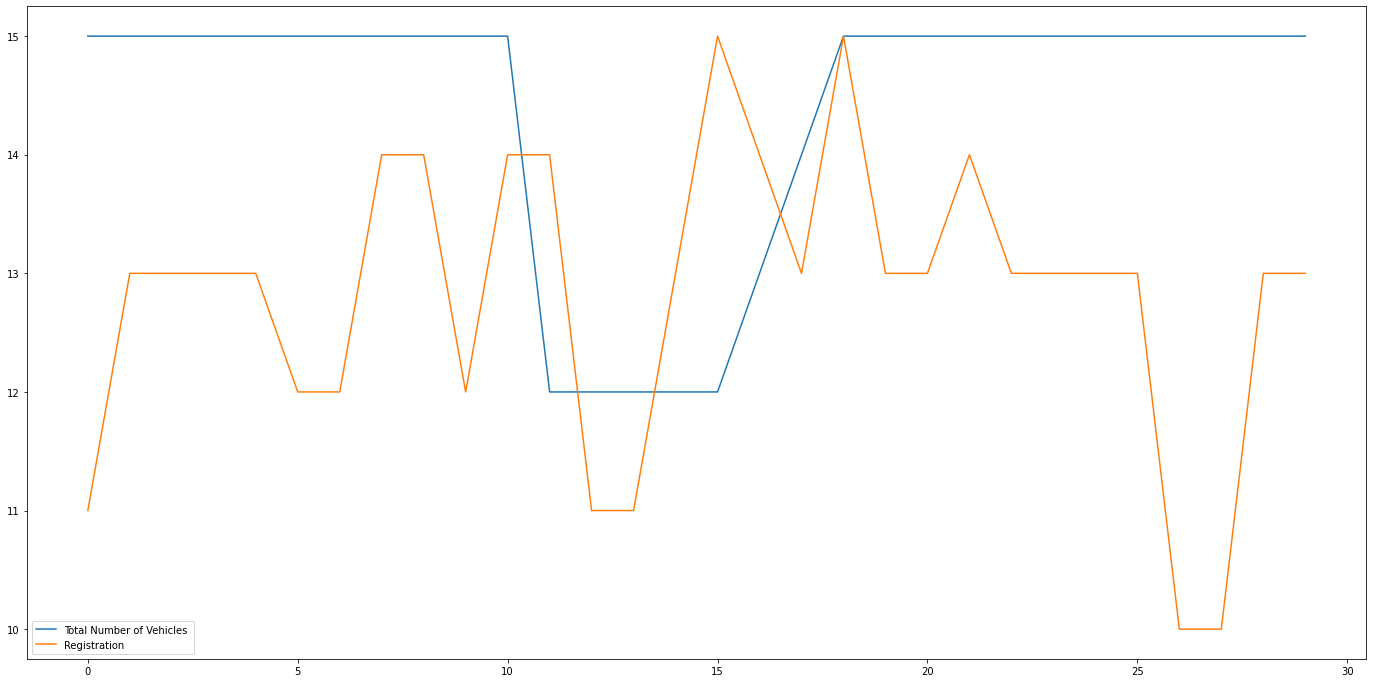

In [11]:
fig, ax = plt.subplots(figsize=(24, 12))
vehicles.plot.line(ax=ax)
veh_inuse.plot.line(ax=ax)
plt.show()

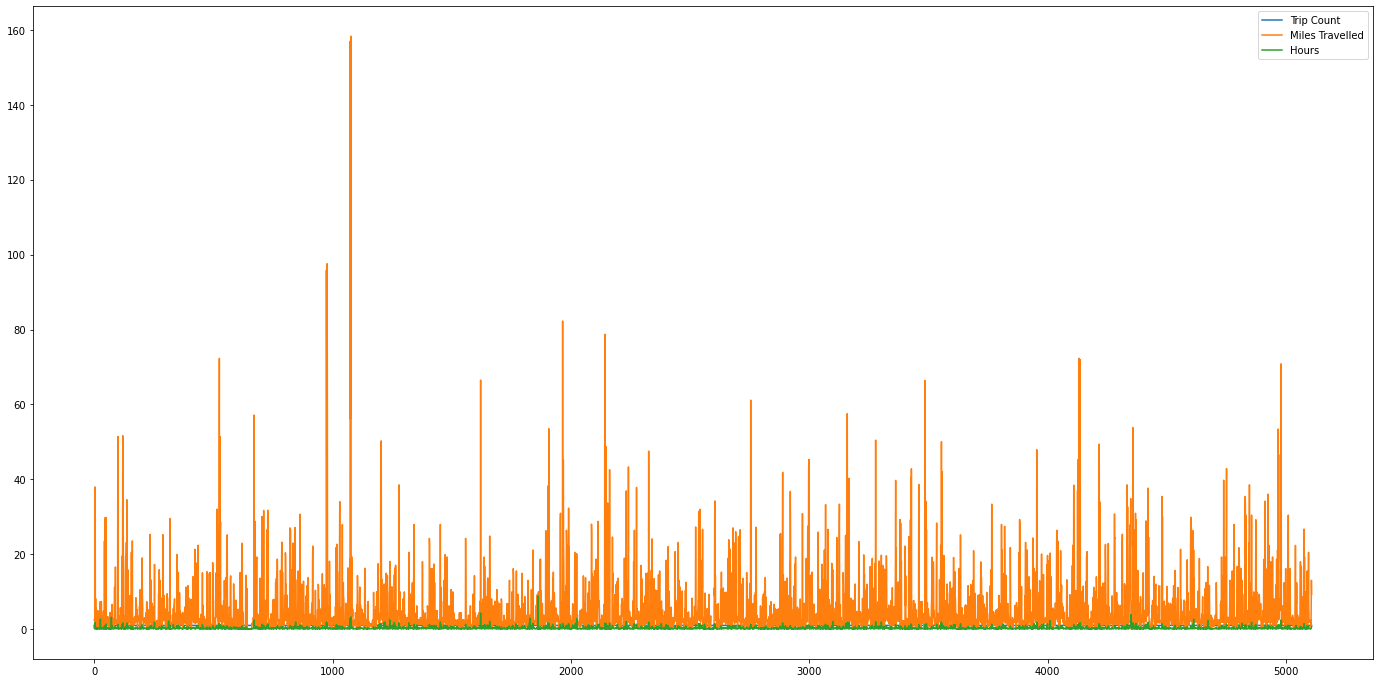

In [12]:
fig, ax = plt.subplots(figsize=(24, 12))
trip.plot.line(ax=ax)
plt.show()